In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import f
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
!unzip "Data.zip"

Archive:  Data.zip
  inflating: US_category_id.json     
  inflating: __MACOSX/._US_category_id.json  
  inflating: USvideos.csv            
  inflating: __MACOSX/._USvideos.csv  


In [3]:
#Extracting the data from the csv file
df = pd.read_csv('USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Data Processing

In [4]:
# Remove each observation whose description contains non-ASCII text

bool_mask = df['description'].apply(lambda x: str(x).isascii())
non_ascii_mask = ~bool_mask

df = df.drop(df[non_ascii_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."


**REWRITE TO ACCOUNT FOR CHANGED METHOD**
We are converting the upload time the datetime object. We noticed there was a '+0:00' after all the terms and after doing some research, we realized this corresponds to the timezone. To verify that all objects were in the same time zone we used a boolean mask and saw every video in our dataframe had the exact same term so we can just remove it.

In [5]:
# convert publish_time to datetime
string_mask = df['publish_time'].apply(lambda x: x.replace('.000Z', ""))

df['publish_time'] = string_mask

df['upload_datetime'] = pd.to_datetime(df['publish_time'])
df = df.drop('publish_time', axis=1)

# removing videos without comments
bool_mask = df['comments_disabled'].apply(lambda x: str(x) == 'True')
df = df.drop(df[bool_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


In [6]:
view_mean = np.mean(df['views'])
# import math

# df['views'] = df['views'] - view_mean
# scaler = StandardScaler()
# df['views'] = scaler.fit_transform(df[['views']])
# df['views'] = df['views'].apply(lambda x: math.log(x))
# print(np.mean(df['views']))

# df['views'] = df['views']/np.linalg.norm(df['views'])
print(np.var(df['views']))

18469076793541.555


# Exploratory Analysis and Data Visualization

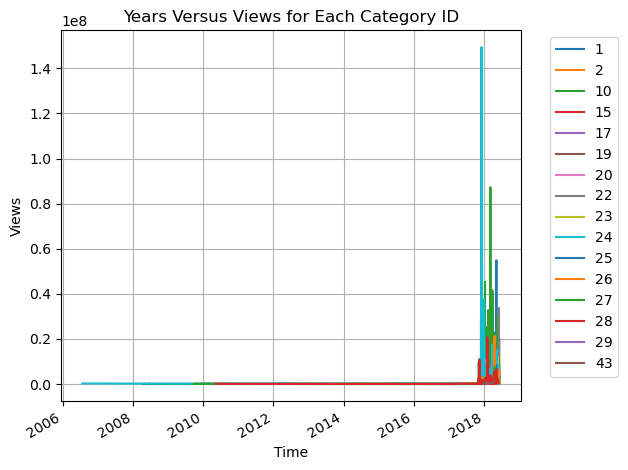

In [7]:
import math
fig, ax = plt.subplots()

# df_tmp = df.copy()
# df_tmp['tmp'] = df_tmp['views'].apply(lambda x: math.log(x))

for key, grp in df.groupby(['category_id']):

    ax = grp.plot(ax=ax, kind='line', x='upload_datetime', y='views', label=key)

plt.title('Years Versus Views for Each Category ID')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


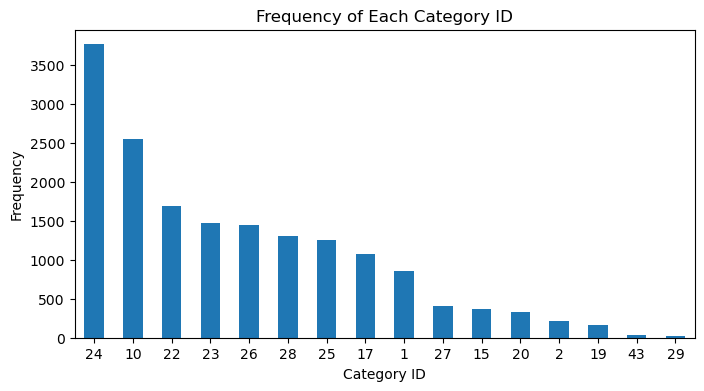

In [8]:
frequency = df['category_id'].value_counts()

plt.figure(figsize=(8, 4))
frequency.plot(kind='bar')
plt.title('Frequency of Each Category ID')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


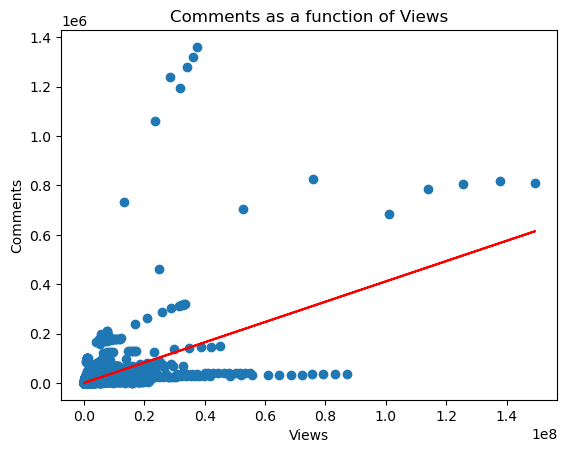

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7274.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        15:33:53   Log-Likelihood:            -1.9742e+05
No. Observations:               16985   AIC:                         3.948e+05
Df Residuals:                   16983   BIC:                         3.949e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.6828    222.116     -1.214      0.2

In [9]:
df_lin_reg = df[['views', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
# print(lst_sq)


# print("Linear Regression is ", str(slope) + " * years + " + str(intercept))
# int('Sum of squared residuals:', residual)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['views'], df['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Views')
ax.set_xlabel('Views')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ views ", data=df).fit()
print(lin_reg.summary())

# sum = 0
# for idx in range(df.shape[0]):

#     x_val = df['Rk'][idx]
#     actual= df['PTS'][idx]
#     pred = x_val * slope + intercept
#     sum += (pred - actual) ** 2

# mse = sum/df.shape[0]
# print('MSE:', mse)
# 

Text(0, 0.5, 'Life Expectancy (years)')

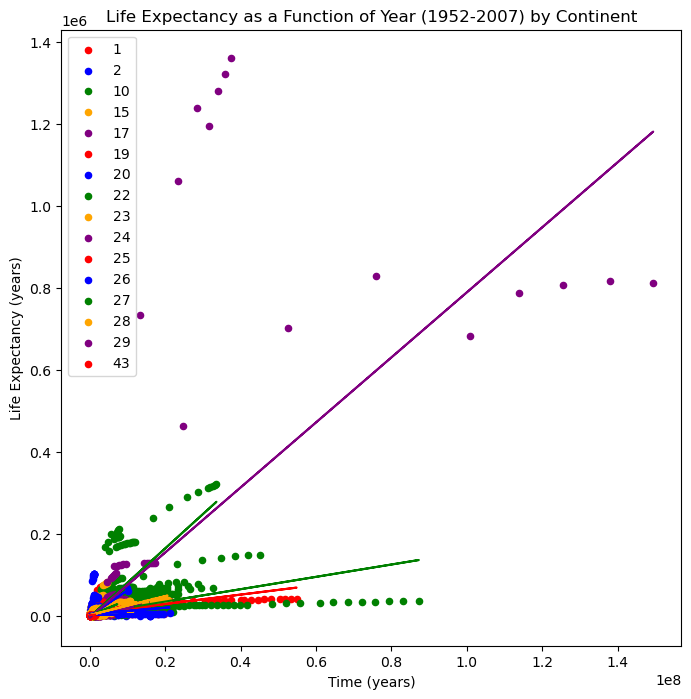

In [10]:
df_by_cont = df.groupby(['category_id'])
groups = df_by_cont.groups

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(8,8))
for idx, (key, values) in enumerate(df.groupby(['category_id'])):

    ax = values.plot(ax=ax, kind='scatter', x='views', y='comment_count', label=key, color=colors[idx%5])
    x = values['views']
    y = values['comment_count']
    res = stats.linregress(x,y)
    ax.plot(x, res.intercept + res.slope*x, colors[idx%5])

ax.set_title('Life Expectancy as a Function of Year (1952-2007) by Continent')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Life Expectancy (years)')

In [11]:
data_str = df.copy()
data_str['cat_id'] = data_str['cat_id'].apply(lambda x: str(x))
lin_reg2 = smf.ols(formula='comment_count ~ category_id*views', data=data_str).fit()
print(lin_reg2.summary())

KeyError: 'cat_id'